# Importing Data and Preparations 

In [1]:
import pandas
from sklearn import datasets
import numpy as np
# Model class
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
def map_iris_output(x):
    '''
    Maps output class of iris dataset predicted by trained model into a name instead of integers
    '''
    if x == 0:
        return "Setosa"
    elif x == 1:
        return "Versicolour"
    else:
        return "Virginica"

In [3]:
# Import Iris
iris = datasets.load_iris()

# Import play-tennis
pandas.read_csv('play-tennis.csv', header=0, index_col=False, true_values=["TRUE", "yes"], false_values=["FALSE", "no"])

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,False
1,sunny,hot,high,True,False
2,overcast,hot,high,False,True
3,rainy,mild,high,False,True
4,rainy,cool,normal,False,True
5,rainy,cool,normal,True,False
6,overcast,cool,normal,True,True
7,sunny,mild,high,False,False
8,sunny,cool,normal,False,True
9,rainy,mild,normal,False,True


# Plain Learning (Full Training)

In [4]:
# Extract the variables and targets
x = iris.data
y = list(map(map_iris_output, iris.target))

#### Naive Bayes

In [37]:
# Createclass that performs Gaussian Naive Bayes
iris_nb_model = GaussianNB()
iris_nb_model.fit(x, y)
# Print theta and sigma. Row = class, column = attributes
print(iris_nb_model.theta_) # class-attributes Gaussian curve's mean
print(iris_nb_model.sigma_) # class-attributes Gaussian curve's standard deviation
# https://www.cs.cmu.edu/~epxing/Class/10701-10s/Lecture/lecture5.pdf

[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
[[0.121764 0.142276 0.029504 0.011264]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


#### Decision Tree

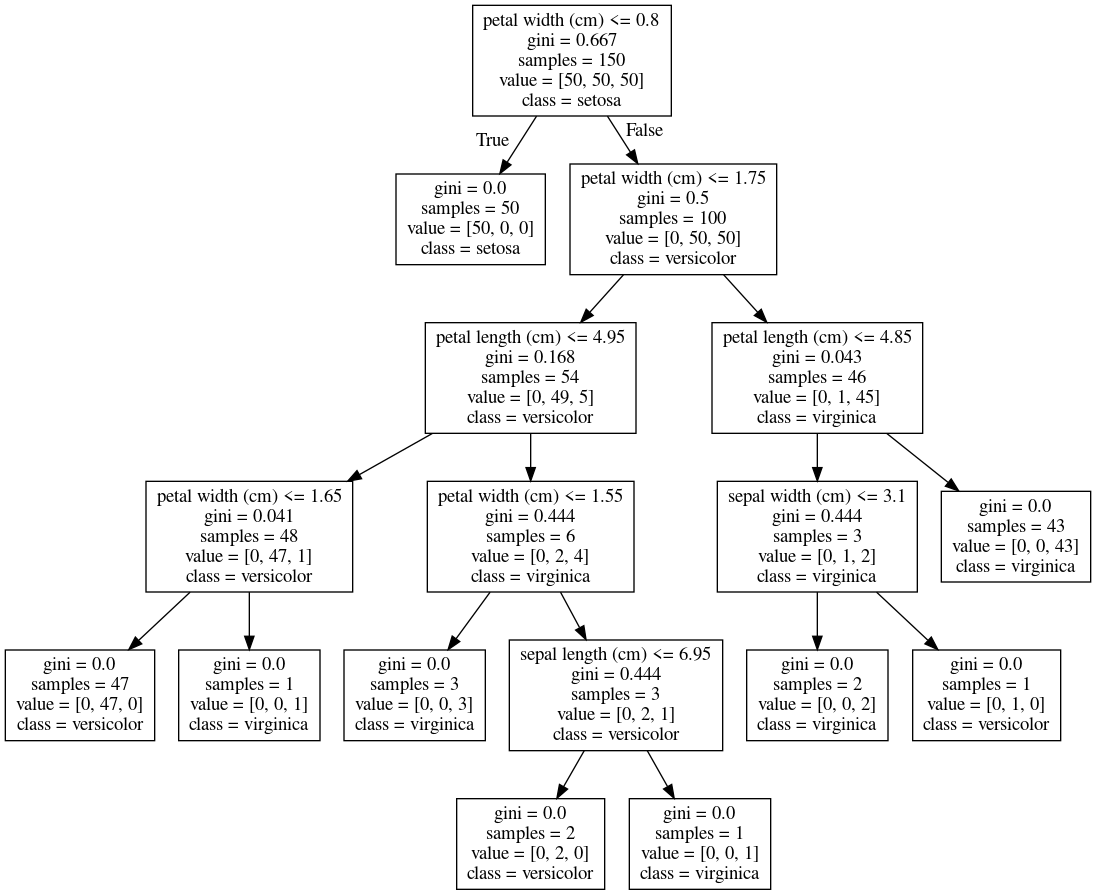

In [6]:
iris_dt_model = DecisionTreeClassifier()
iris_dt_model.fit(x, y)
# Display the model
from sklearn.tree import export_graphviz
export_graphviz(iris_dt_model, out_file='iris_dt_model.dot', feature_names = iris.feature_names, class_names = iris.target_names)
import pydot
(tree,) = pydot.graph_from_dot_file('iris_dt_model.dot')
tree.write_png('iris_dt_model.png')
from IPython.display import Image
Image(filename = 'iris_dt_model.png')

#### KNN 

In [7]:
iris_knn_model = KNeighborsClassifier(n_neighbors=5)
iris_knn_model.fit(x, y)
# KNN has no model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

####  Neural Network MLP

In [38]:
# Fit the model
iris_mlp_model = MLPClassifier(activation='logistic', solver='sgd', max_iter=10000, learning_rate_init=0.0005, hidden_layer_sizes=(2,))
iris_mlp_model.fit(x, y)
# Print weights
iris_mlp_model.coefs_

[array([[ 0.41817201,  0.45362657],
        [-0.16450481,  0.04799526],
        [-0.55726524,  0.37598562],
        [-0.19558556, -0.49686809]]),
 array([[-0.47727659, -0.07302217,  0.58995894],
        [ 0.5046534 , -0.34329368, -0.23436013]])]

# Train-Test Learning

In [9]:
# Import function to split test-data
from sklearn.model_selection import train_test_split

# Import function to generate confusion matrix
from sklearn.metrics import confusion_matrix

# Prepare data for split-training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
print(len(x_train), len(x_test), len(y_train), len(y_test))

135 15 135 15


In [10]:
import matplotlib.pyplot as plt
import itertools

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



#### Naive Bayes 

In [11]:
iris_nb_split_model = GaussianNB()
iris_nb_split_model.fit(x_train, y_train)

GaussianNB(priors=None)

In [12]:
score = iris_nb_split_model.score(x_test, y_test)
print("Accuracy of Naive Bayes model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of Naive Bayes model on the Iris dataset with split-train schema is 93.33333333333333%


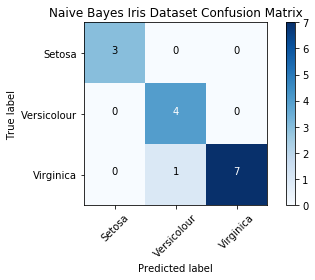

In [13]:
# Calculate prediction of test data
y_pred = iris_nb_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_nb_split_model.classes_, title="Naive Bayes Iris Dataset Confusion Matrix")
plt.show()

#### Decision Tree

In [14]:
iris_dt_split_model = DecisionTreeClassifier()
iris_dt_split_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
score = iris_dt_split_model.score(x_test, y_test)
print("Accuracy of Decision Tree model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of Decision Tree model on the Iris dataset with split-train schema is 93.33333333333333%


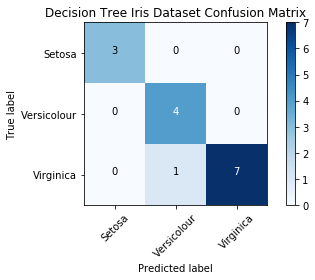

In [16]:
# Calculate prediction of test data
y_pred = iris_dt_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_dt_split_model.classes_, title="Decision Tree Iris Dataset Confusion Matrix")
plt.show()

#### KNN

In [17]:
iris_knn_split_model = KNeighborsClassifier(n_neighbors=5)
iris_knn_split_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
score = iris_knn_split_model.score(x_test, y_test)
print("Accuracy of KNN model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of KNN model on the Iris dataset with split-train schema is 93.33333333333333%


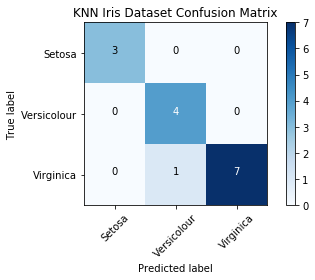

In [19]:
# Calculate prediction of test data
y_pred = iris_knn_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_knn_split_model.classes_, title="KNN Iris Dataset Confusion Matrix")
plt.show()

#### Neural Network MLP 

In [20]:
iris_mlp_split_model = MLPClassifier(activation='logistic', max_iter=10000, learning_rate_init=0.0005)
iris_mlp_split_model.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0005, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
score = iris_mlp_split_model.score(x_test, y_test)
print("Accuracy of MLP model on the Iris dataset with split-train schema is", str(score * 100) + '%')

Accuracy of MLP model on the Iris dataset with split-train schema is 100.0%


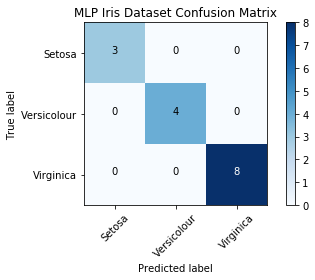

In [22]:
# Calculate prediction of test data
y_pred = iris_mlp_split_model.predict(x_test)

# Plot the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, iris_mlp_split_model.classes_, title="MLP Iris Dataset Confusion Matrix")
plt.show()

# 10-fold Cross-Validation Training

In [23]:
# Import function to perform k-fold cross validation
from sklearn.model_selection import cross_validate

#### Naive Bayes

In [24]:
iris_nb_cv_model = GaussianNB()
scores = cross_validate(iris_nb_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of Naive Bayes Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of Naive Bayes Model on the Iris dataset using the 10-fold cross validation method is 95.33%


#### Decision Tree

In [25]:
iris_dt_cv_model = GaussianNB()
scores = cross_validate(iris_dt_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of Decision Tree Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of Decision Tree Model on the Iris dataset using the 10-fold cross validation method is 95.33%


#### KNN

In [26]:
iris_knn_cv_model = GaussianNB()
scores = cross_validate(iris_knn_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of KNN Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of KNN Model on the Iris dataset using the 10-fold cross validation method is 95.33%


#### Neural Network MLP

In [27]:
iris_mlp_cv_model = GaussianNB()
scores = cross_validate(iris_mlp_cv_model, x, y, cv=10, return_train_score=True)['test_score']
final_score = sum(scores) / len(scores) * 100
print("Accuracy of MLP Model on the Iris dataset using the 10-fold cross validation method is {:.2f}%".format(final_score))

Accuracy of MLP Model on the Iris dataset using the 10-fold cross validation method is 95.33%


# Saving and loading model

In [28]:
from sklearn.externals import joblib

In [29]:
# saving
joblib.dump(iris_mlp_cv_model, 'iris_mlp_cv.pkl', compress=9)

['iris_mlp_cv.pkl']

In [30]:
# loading into iris_mlp_cv_model_clone
iris_mlp_cv_model_clone = joblib.load('iris_mlp_cv.pkl')

# New instance

In [31]:
ghetto_iris_data = np.array([[4., 3.5, 1.4, 0.3],
                         [5.4, 3.2, 4. , 0.2],
                         [6. , 3. , 5.1, 1.8]])

#### Naive Bayes

In [32]:
iris_nb_model.predict(ghetto_iris_data)

array(['Setosa', 'Versicolour', 'Virginica'], dtype='<U11')

#### Decision Tree

In [33]:
iris_dt_model.predict(ghetto_iris_data)

array(['Setosa', 'Setosa', 'Virginica'], dtype='<U11')

#### KNN

In [34]:
iris_knn_model.predict(ghetto_iris_data)

array(['Setosa', 'Versicolour', 'Virginica'], dtype='<U11')